In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/spill_no-spill classification/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21 files belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/spill_no-spill classification/trained_petr.model.h5')

# New Section

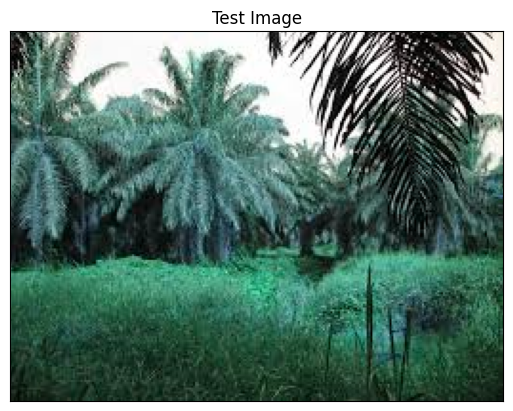

In [ ]:
import cv2
image_path='/content/drive/MyDrive/spill_no-spill classification/Test/No-Spill/NoSpill_201.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 31ms/step


In [ ]:
print(predictions)

[[0.9788619  0.02113805]]


In [ ]:
test_set.class_names

['No-Spill', 'Spill']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([0]),)


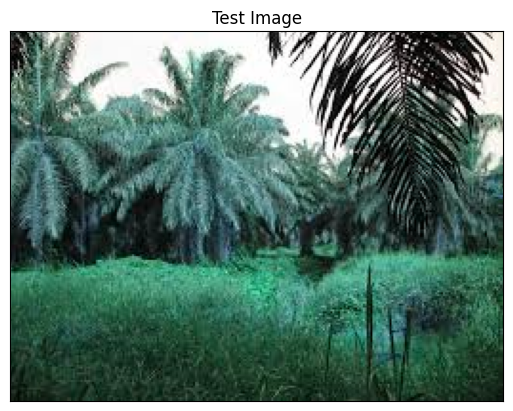

In [ ]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a No-Spill
